MODELO DE ISING

Se realiza la implementación del modelo de Ising para el cálculo de la energía para un material ferromagnético.

De la electrodinámica clásica se sabe que la magnetización de un material magnético se dá debido a un conglomerado de dipolos a lo largo del material. Si los dipolos apuntan en direcciones totalmente aleatorias , la magnetización total será muy cercana a cero. Por otro lado, si los dipolos tienen una dirección común, el material adquiere un momento magnético macroscópico. 
El modelo de Ising, toma en consideración que el material está constituido de $NxN$ dipolos, y solo pueden apuntar hacia arriba o hacia abajo (realmente podrían apuntar en cualquier dirección). Entonces, la dirección del dipolo queda definida por $S_{i}= \pm 1$, con $S_{i} = 1$ el dipolo apunta hacia arriba, y $S_{i}=-1$ el dipolo apunta hacia abajo.
Para el cálculo de la energía total del material, se utiliza:
\begin{equation}
E = -J\sum_{<ij>}S_{i}S_{j}
\end{equation}
La suma sobre $<ij>$ hace referencia a que cada dipolo en la posición $i$, interactúa con sus vecinos. Debe hacerse la aclaración de que si el elemento $S_{i}S_{j}$ ya se tuvo encuenta en la suma, el elemento $S_{j}S_{i}$ no puede ser tomado en cuenta una vez más (ya ocurrió la interacción $ij$).

Para iniciar con el modelo se genera una matriz $n$ de dimensiones $10\times10$, esta matriz contiene el valor de los dipolos $S$

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

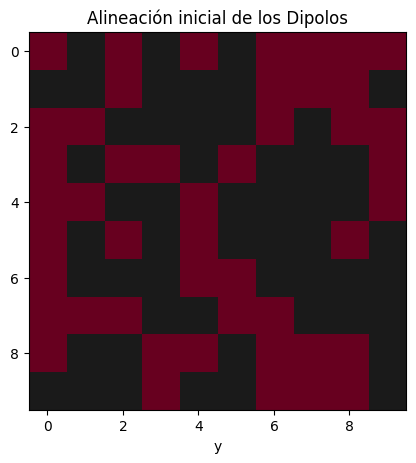

Magnetización Total =  6


In [8]:
N = 10 # dimensión horizontal del arreglo de dipolos
n = np.ones([N,N], dtype = int) # arreglo bidimensional de dipolos a utilizar
rd.seed(15) # se establece una semilla para poder reproducir el modelo
# se establecen el valor de los dipolos de forma aleatoria en el arreglo con valores de +1 o -1
for i in range(N):
    for j in range(N):
        if rd.random() < 0.5:
            n[i,j] = 1
        else:
            n[i,j] = -1
n_copy = np.copy(n) # copia del arreglo de dipolos para posteriores usos
plt.figure(num=1, figsize = (5,5),dpi = 100)
plt.imshow(n, cmap = 'RdGy')
plt.title('Alineación inicial de los Dipolos')
plt.xlabel('x')
plt.xlabel('y')
plt.show()
print('Magnetización Total = ',sum(sum(n)))

La ecuación de la energía es:
\begin{equation}
E = -J\sum_{<ij>} s_{i}s_{j}
\end{equation}
Donde $J$ garantiza que las interacciones sean ferromagnéticas, esto es, una mínima energía para los dipolos que están alineados en la misma dirección, y mayor energía para los que nó. Ahora bien, debe desarrollarse una función que calcule la energía del estado actual del sistema, para ello se establece que el dipolo $S$ ubicado en la posición $i,j$ del arreglo $n$ interactúa (en los cálculos) con los siguientes elementos:
\begin{equation}
    S_{i,j} \rightarrow (S_{i-1,j+1}),(S_{i,j+1}),(S_{i+1,j}),(S_{i+1,j+1})
\end{equation}
Esto bajo las siguientes $restricciones:$
\begin{equation}
    a = j+1 < N, b = i-1 >=0, c = i+1 < N
\end{equation}
En la figura acontinuación se aprecia la interacción que entra dentro del cálculo una única vez. Con este forma de establecer las interacciones, se garantiza que cada interacción sea considerada en el cálculo de la energía una sola vez.
                                    

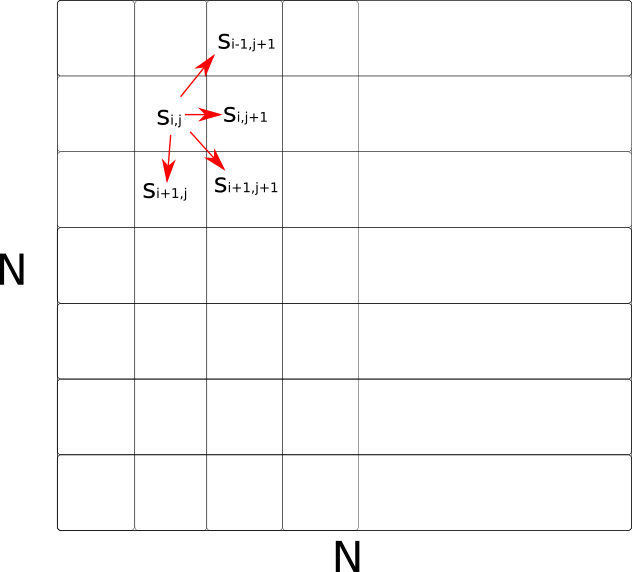

La constante $J=1$ para la simulación

In [3]:
def E_f(n): #función para el cálculo de la energía
    E = 0 # variable donde se acumula la energía
    J = 1 # variable de proporcionalidad
    N = len(n) # dimensión 
    for i in range(N):
        for j in range(N):
            # variables para las restricciones
            a = j+1
            b = i-1
            c = i+1
            # restricciones para la suma
            if a < N:
                E += -J*n[i,j]*n[i,a]
            if a < N and b >= 0:
                E += -J*n[i,j]*n[b,a]
            if c < N:
                E += -J*n[i,j]*n[c,j]
            if c < N and a < N:
                E += -J*n[i,j]*n[c,a]
    return(E)

In [4]:
E_inicial = E_f(n)
print('Energía inicial = ',E_inicial)

Energía inicial =  -20


Ahora se toma una posición $(i,j)$ aleatória en el arreglo $n$  y se invierte su valor (i.e $+1$ a $-1$), se calcula la energía tras haber realizado esta inversión, si la energía es menor se deja el valor de dicho cambio del valor del dipolo, y se procede a repetir el proces con otro número aleatório. Por otro lado, si la energía despues desl cambio($E_{actual}$) es mayor a la energía anterior ($E_{inicial}$), se estima el valor de dicha variación ($\delta E$), bajo el método montecarlo (la naturaleza también así lo ha demostrado), existirá una probabilidad de que dicho estado de energía sea alcanzado, dicha probabilidad está dada por:
\begin{equation}
P(E_{actual}) = \exp(-\beta \delta E)
\end{equation}
Donde $\beta=\frac{k_{B}}{T}$ , y $K_{B}$ es la constante de Boltzmann. 
Si se lanza un número aleatório entre $0$ y $1$, y es menor a $P(E_{actual})$ entonces se actualiza el estado del valor del dipolo, de lo contrario se regresa el valor del dipolo a su estado original. Este proceso se repite para $M$ pasos, en cada paso se obtiene el valor de la magnetización total $M_{total}$. Lo esperado es que el valor de la magnetización evolucione hasta llegar a un punto de equilibrio que no es cero como el valor de la magnetización inicial.

Text(0, 0.5, 'Magnetización')

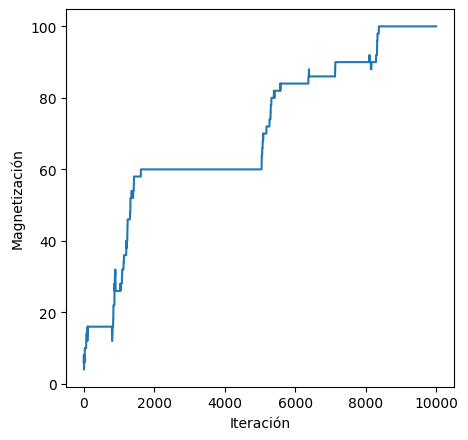

In [5]:
M = 10000 # número de iteraciones
M_arreglo =  [] # arreglo para la actualización del momento magnético actual
E_total = E_inicial # se establece 
for k in range(M):
    i,j = rd.randrange(10),rd.randrange(10) # posicion aleatória i,j dentro del arreglo
    aux = np.copy(n) # se copia el arreglo de los dipolos 
    aux[i,j] = -1*aux[i,j] # se modifica el estado del dipolo
    E_actual = E_f(aux) # se calcula la energía de dicho cambio de estado
    # condiciones para dejar la modificación o regresar al estado anterior
    if E_actual < E_inicial:
        n = np.copy(aux)
        dE = E_actual-E_inicial
        E_inicial = E_actual+dE # se actualiza el valor de la energía
               
    else:
        dE = E_actual-E_inicial
        if rd.random()<np.exp(-dE): # selección montecarlo
            n = np.copy(aux)
            E_inicial= E_actual+dE # se actualiza la energía
            
    M_arreglo.append(sum(sum(n))) # se determina la magnetización actual
plt.figure(num=2, figsize =(5,5),dpi=100)
plt.plot(M_arreglo)
plt.xlabel('Iteración')
plt.ylabel('Magnetización')
plt.show()   

Como se esperaba, el valor de la magnetización parte de un valor cercano a cero, y tiende a estabilizarse en un valor diferente de cero. Si se establece un mayor número de iteraciones, debería encontrarse que la magnetización tiende a un valor bien definido.

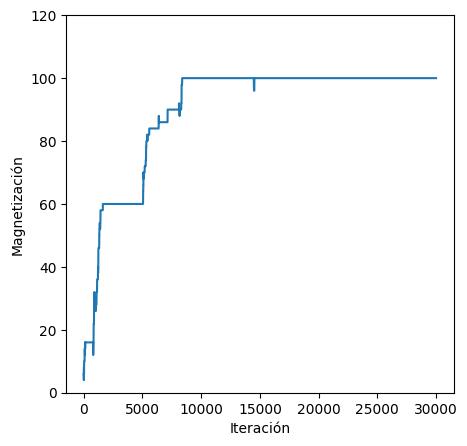

In [9]:
n = np.copy(n_copy) # se reestablecen los valores del arreglo dipolar inicial 
M = 30000 # número de iteraciones
M_arreglo =  [] # arreglo para la actualización del momento magnético actual
E_inicial = E_f(n) # se recalcula la energía inicial
for k in range(M):
    i,j = rd.randrange(10),rd.randrange(10) # posicion aleatória i,j dentro del arreglo
    aux = np.copy(n) # se copia el arreglo de los dipolos 
    aux[i,j] = -1*aux[i,j] # se modifica el estado del dipolo
    E_actual = E_f(aux) # se calcula la energía de dicho cambio de estado
    # condiciones para dejar la modificación o regresar al estado anterior
    if E_actual < E_inicial:
        n = np.copy(aux)
        dE = E_actual-E_inicial
        E_inicial = E_actual+dE # se actualiza el valor de la energía
               
    else:
        dE = E_actual-E_inicial
        if rd.random()<np.exp(-dE): # selección montecarlo
            n = np.copy(aux)
            E_inicial= E_actual+dE # se actualiza la energía
            
    M_arreglo.append(sum(sum(n))) # se determina la magnetización actual
plt.figure(num=2, figsize =(5,5),dpi=100)
plt.plot(M_arreglo)
plt.xlabel('Iteración')
plt.ylabel('Magnetización')
plt.ylim(0,120)
plt.show()   

Cómo era previsto, el valor de la magnetización $M$ se estabiliza en $M=100$ en alrededor de la iteración $9000$